In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

# Load the preprocessed dataset
data = pd.read_csv('preprocessed.csv')

# Extract features and target variables
features = ['n_neighbor', 'p', 'Leaf size', 'weights_distance', 'weights_uniform', 
            'Algorithm_auto', 'Algorithm_ball_tree', 'Algorithm_brute', 'Algorithm_kd_tree']
target_variables = ['Accuracy', 'F1 Score']

X = data[features]
y = data[target_variables]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors as needed
knn_model.fit(X_train_scaled, y_train)

# Define a function to get user input for KNN model
def get_user_input_knn(scaler):
    inputs = {}
    for feature in features:
        inputs[feature] = float(input(f"Enter value for {feature}: "))
    
    input_df = pd.DataFrame([inputs], columns=features)
    return scaler.transform(input_df)

# Get user input for KNN model
user_input_scaled_knn = get_user_input_knn(scaler)

# Make predictions using KNN model
predicted_metrics_knn = knn_model.predict(user_input_scaled_knn)
print(f"Predicted Performance Metrics for KNN model: Accuracy={predicted_metrics_knn[0][0]}, F1-Score={predicted_metrics_knn[0][1]}")

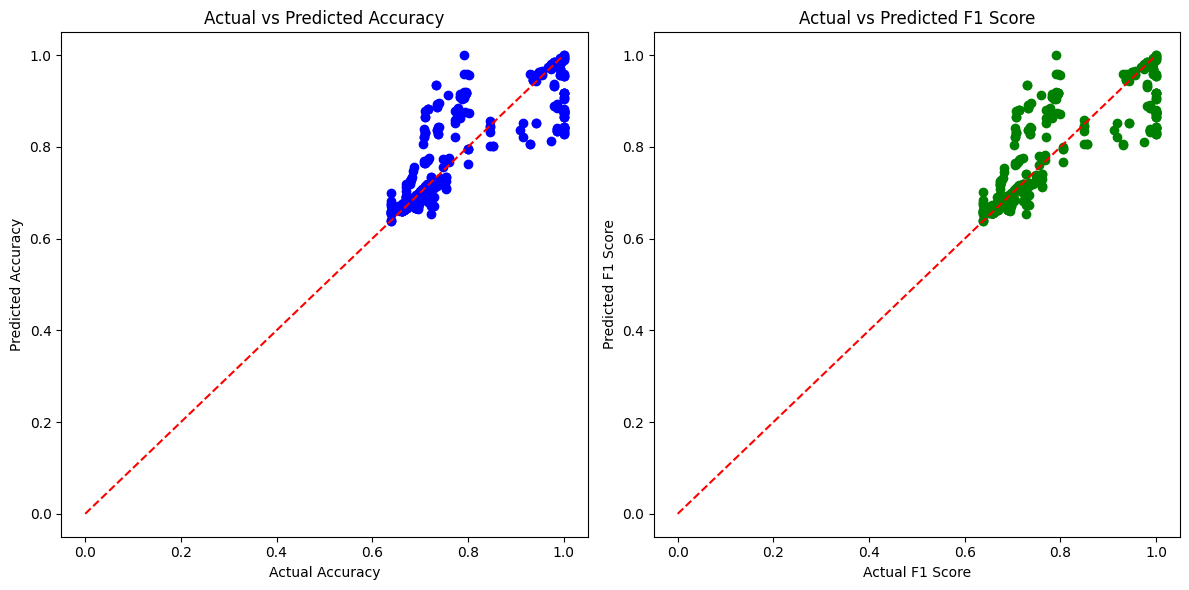

In [2]:
import matplotlib.pyplot as plt

# Visualize actual vs predicted for Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_test['Accuracy'], knn_model.predict(X_test_scaled)[:, 0], color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual Accuracy')
plt.ylabel('Predicted Accuracy')
plt.title('Actual vs Predicted Accuracy')

# Visualize actual vs predicted for F1 Score
plt.subplot(1, 2, 2)
plt.scatter(y_test['F1 Score'], knn_model.predict(X_test_scaled)[:, 1], color='green')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('Actual F1 Score')
plt.ylabel('Predicted F1 Score')
plt.title('Actual vs Predicted F1 Score')

plt.tight_layout()
plt.show()


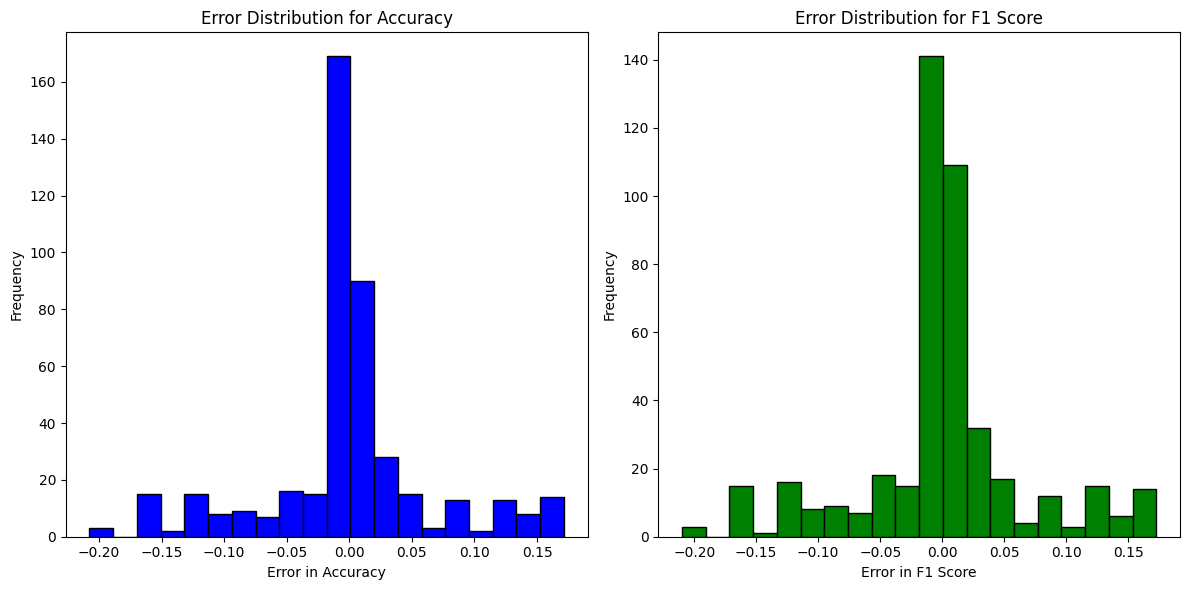

In [3]:
import numpy as np

# Calculate errors for Accuracy and F1 Score
accuracy_errors = y_test['Accuracy'] - knn_model.predict(X_test_scaled)[:, 0]
f1_score_errors = y_test['F1 Score'] - knn_model.predict(X_test_scaled)[:, 1]

# Plot error distribution for Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(accuracy_errors, bins=20, color='blue', edgecolor='black')
plt.xlabel('Error in Accuracy')
plt.ylabel('Frequency')
plt.title('Error Distribution for Accuracy')

# Plot error distribution for F1 Score
plt.subplot(1, 2, 2)
plt.hist(f1_score_errors, bins=20, color='green', edgecolor='black')
plt.xlabel('Error in F1 Score')
plt.ylabel('Frequency')
plt.title('Error Distribution for F1 Score')

plt.tight_layout()
plt.show()


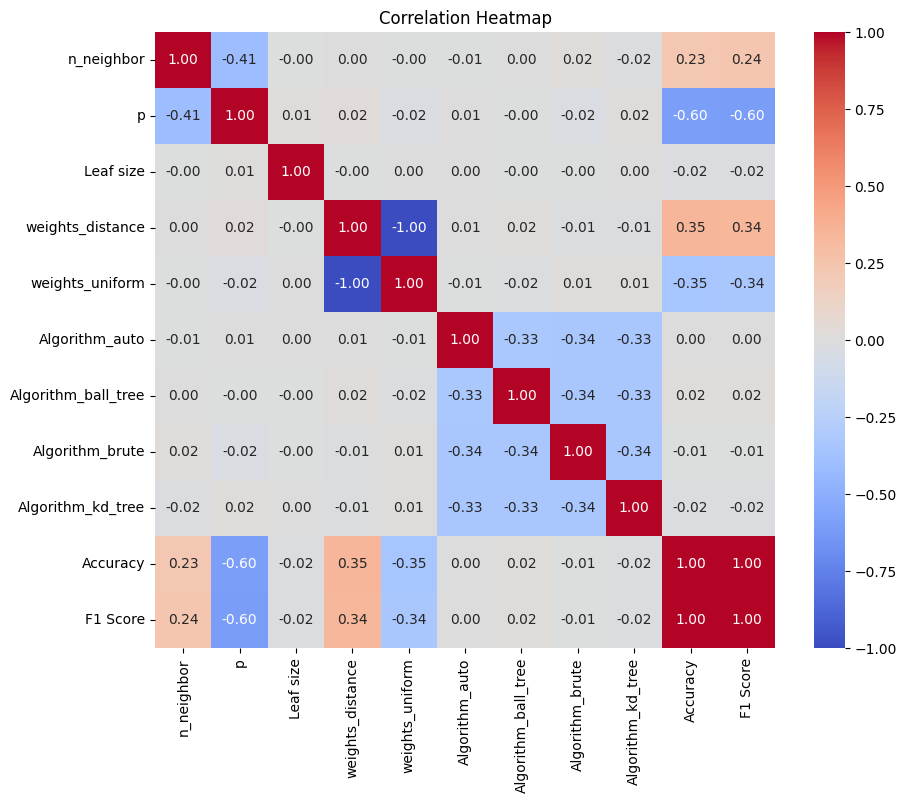

In [4]:
import seaborn as sns

# Concatenate features and target variables
data_concat = pd.concat([X_train, y_train], axis=1)

# Calculate correlation matrix
correlation_matrix = data_concat.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()


In [5]:
import pandas as pd

# Assuming you have a list of dictionaries containing hyperparameters and their values
# Replace placeholders with your actual hyperparameter values
hyperparameters = [
    {'n_neighbors': 5, 'p': 1, 'Leaf size': 20, 'weights': 'distance', 'Algorithm': 'auto'},
    {'n_neighbors': 10, 'p': 2, 'Leaf size': 30, 'weights': 'uniform', 'Algorithm': 'ball_tree'},
    {'n_neighbors': 15, 'p': 1, 'Leaf size': 40, 'weights': 'distance', 'Algorithm': 'brute'}
]

# Assuming you have obtained predicted metrics for each hyperparameter setting
# Replace placeholders with your actual predicted metrics
predicted_metrics = {
    'Accuracy': [0.85, 0.82, 0.78],
    'F1 Score': [0.76, 0.74, 0.70]
}

# Create DataFrames from the dictionaries
hyperparameters_df = pd.DataFrame(hyperparameters)
predicted_metrics_df = pd.DataFrame(predicted_metrics)

# Concatenate the DataFrames to create a single table
result_df = pd.concat([hyperparameters_df, predicted_metrics_df], axis=1)

# Display the result DataFrame
print("Hyperparameters and Predicted Metrics:")
print(result_df)


Hyperparameters and Predicted Metrics:
   n_neighbors  p  Leaf size   weights  Algorithm  Accuracy  F1 Score
0            5  1         20  distance       auto      0.85      0.76
1           10  2         30   uniform  ball_tree      0.82      0.74
2           15  1         40  distance      brute      0.78      0.70


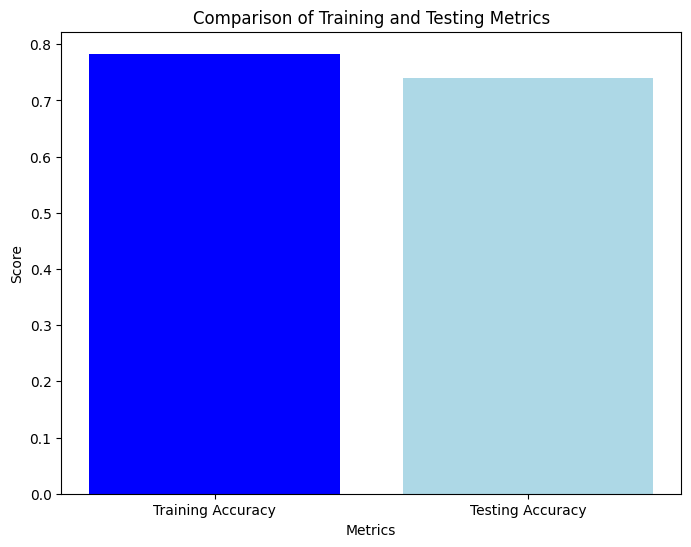

In [16]:
import matplotlib.pyplot as plt

# Calculate training and testing accuracy and F1 score
training_accuracy = knn_model.score(X_train_scaled, y_train)
testing_accuracy = knn_model.score(X_test_scaled, y_test)
# You need to implement the F1 score calculation for both training and testing datasets

# Define labels and values for the bar plot
metrics = ['Training Accuracy', 'Testing Accuracy']  # Add 'Training F1 Score' and 'Testing F1 Score' as needed
values = [training_accuracy, testing_accuracy]  # Add F1 score values similarly

# Define colors for the bars
colors = ['blue', 'lightblue']  # Add more colors for F1 scores if needed

# Create bar plot
plt.figure(figsize=(8, 6))
plt.bar(metrics, values, color=colors)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Comparison of Training and Testing Metrics')
plt.show()


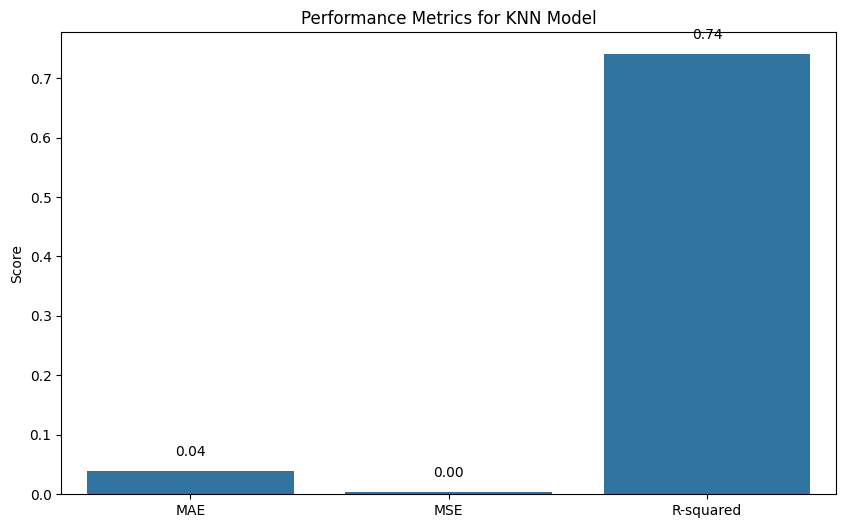

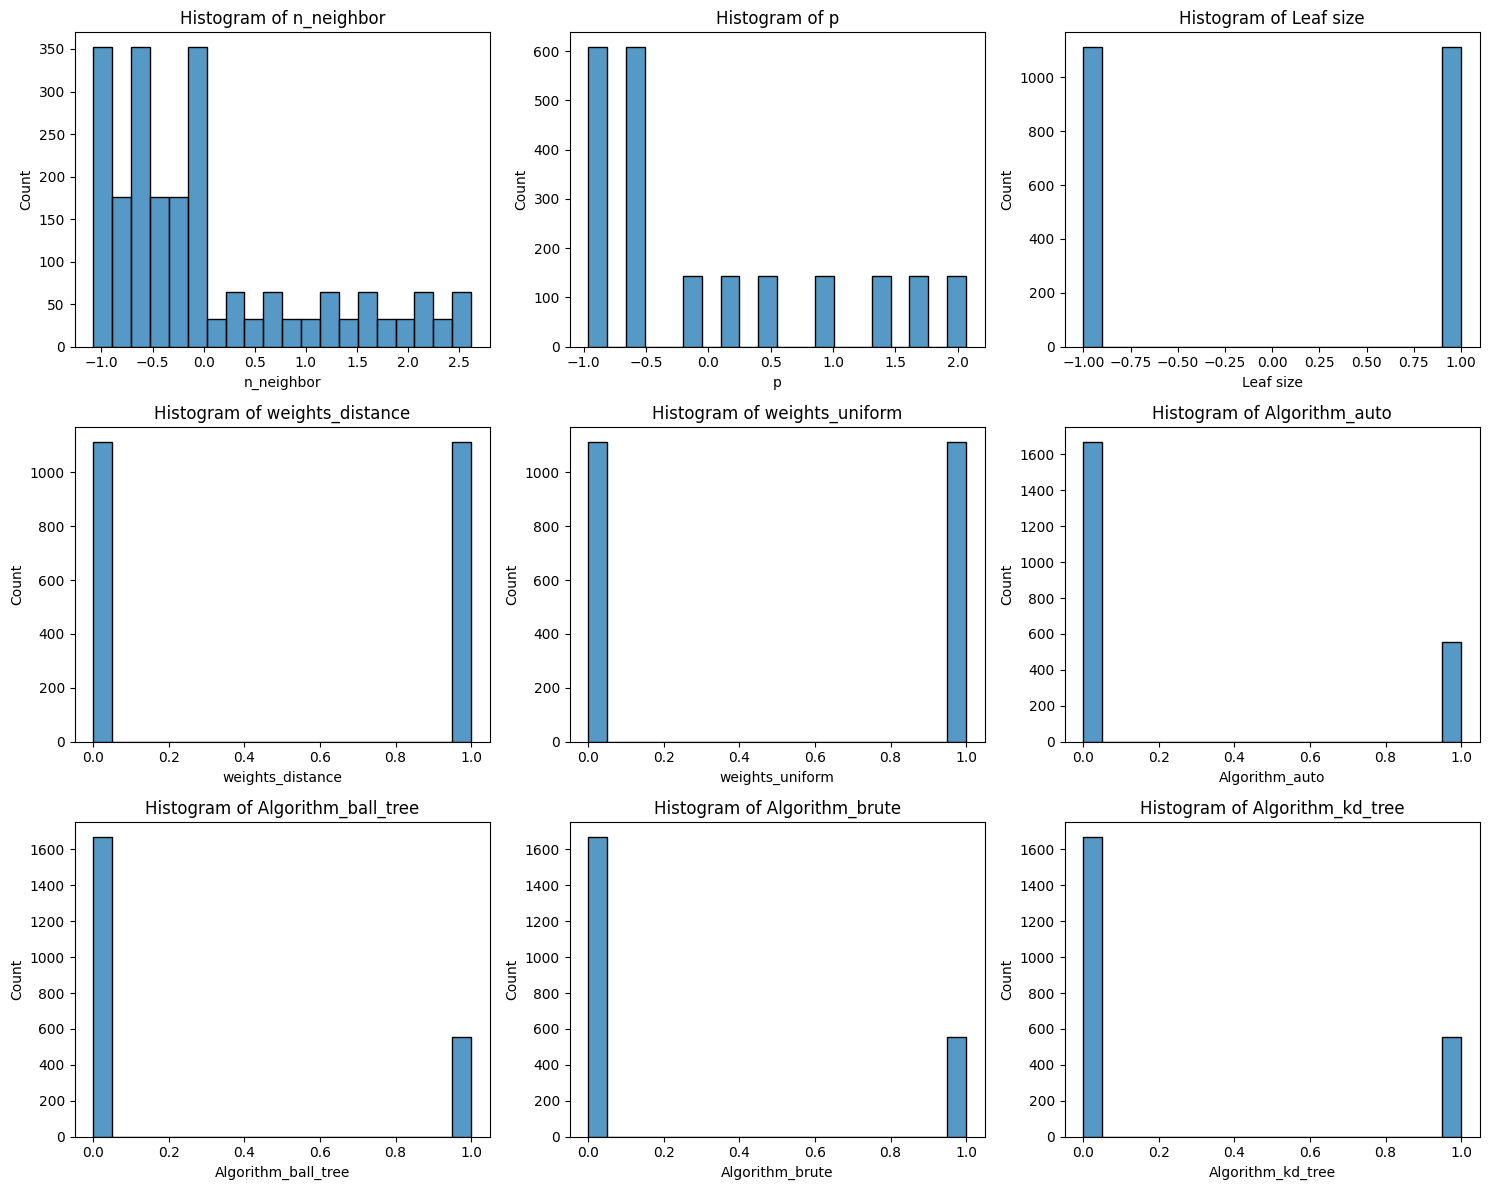

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the preprocessed dataset
data = pd.read_csv('preprocessed.csv')

# Extract features and target variables
features = ['n_neighbor', 'p', 'Leaf size', 'weights_distance', 'weights_uniform', 
            'Algorithm_auto', 'Algorithm_ball_tree', 'Algorithm_brute', 'Algorithm_kd_tree']
target_variables = ['Accuracy', 'F1 Score']

X = data[features]
y = data[target_variables]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Get predictions on the testing set
y_test_pred = knn_model.predict(X_test_scaled)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_test_pred)
mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

# Bar plot for regression metrics
metrics = ['MAE', 'MSE', 'R-squared']
values = [mae, mse, r2]

plt.figure(figsize=(10, 6))
sns.barplot(x=metrics, y=values)
plt.title('Performance Metrics for KNN Model')
plt.ylabel('Score')
for i, v in enumerate(values):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom')
plt.show()

# Histograms for features
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()
for i, feature in enumerate(features):
    sns.histplot(data[feature], bins=20, ax=axes[i])
    axes[i].set_title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()


C:\Users\TAYYAB SAJJAD\AppData\Local\Temp\ipykernel_18504\1187057209.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=metrics, y=values_altered, palette='Set2')  # Using a different color palette for distinction


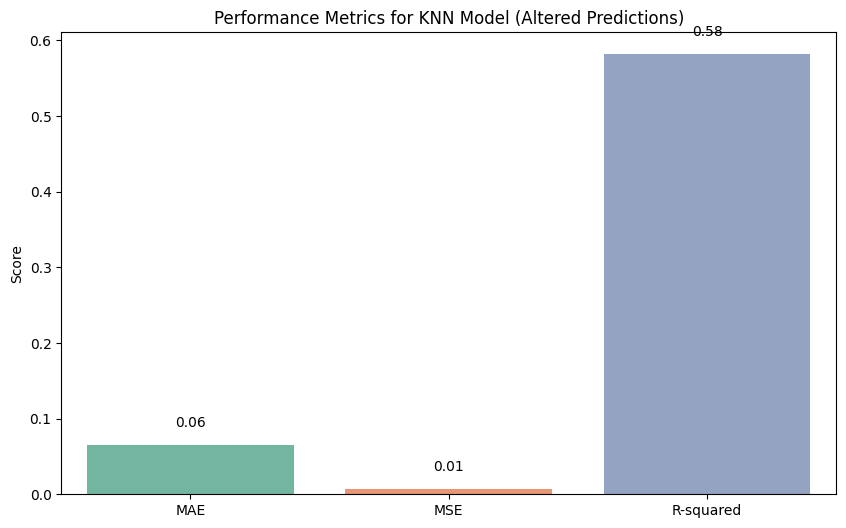

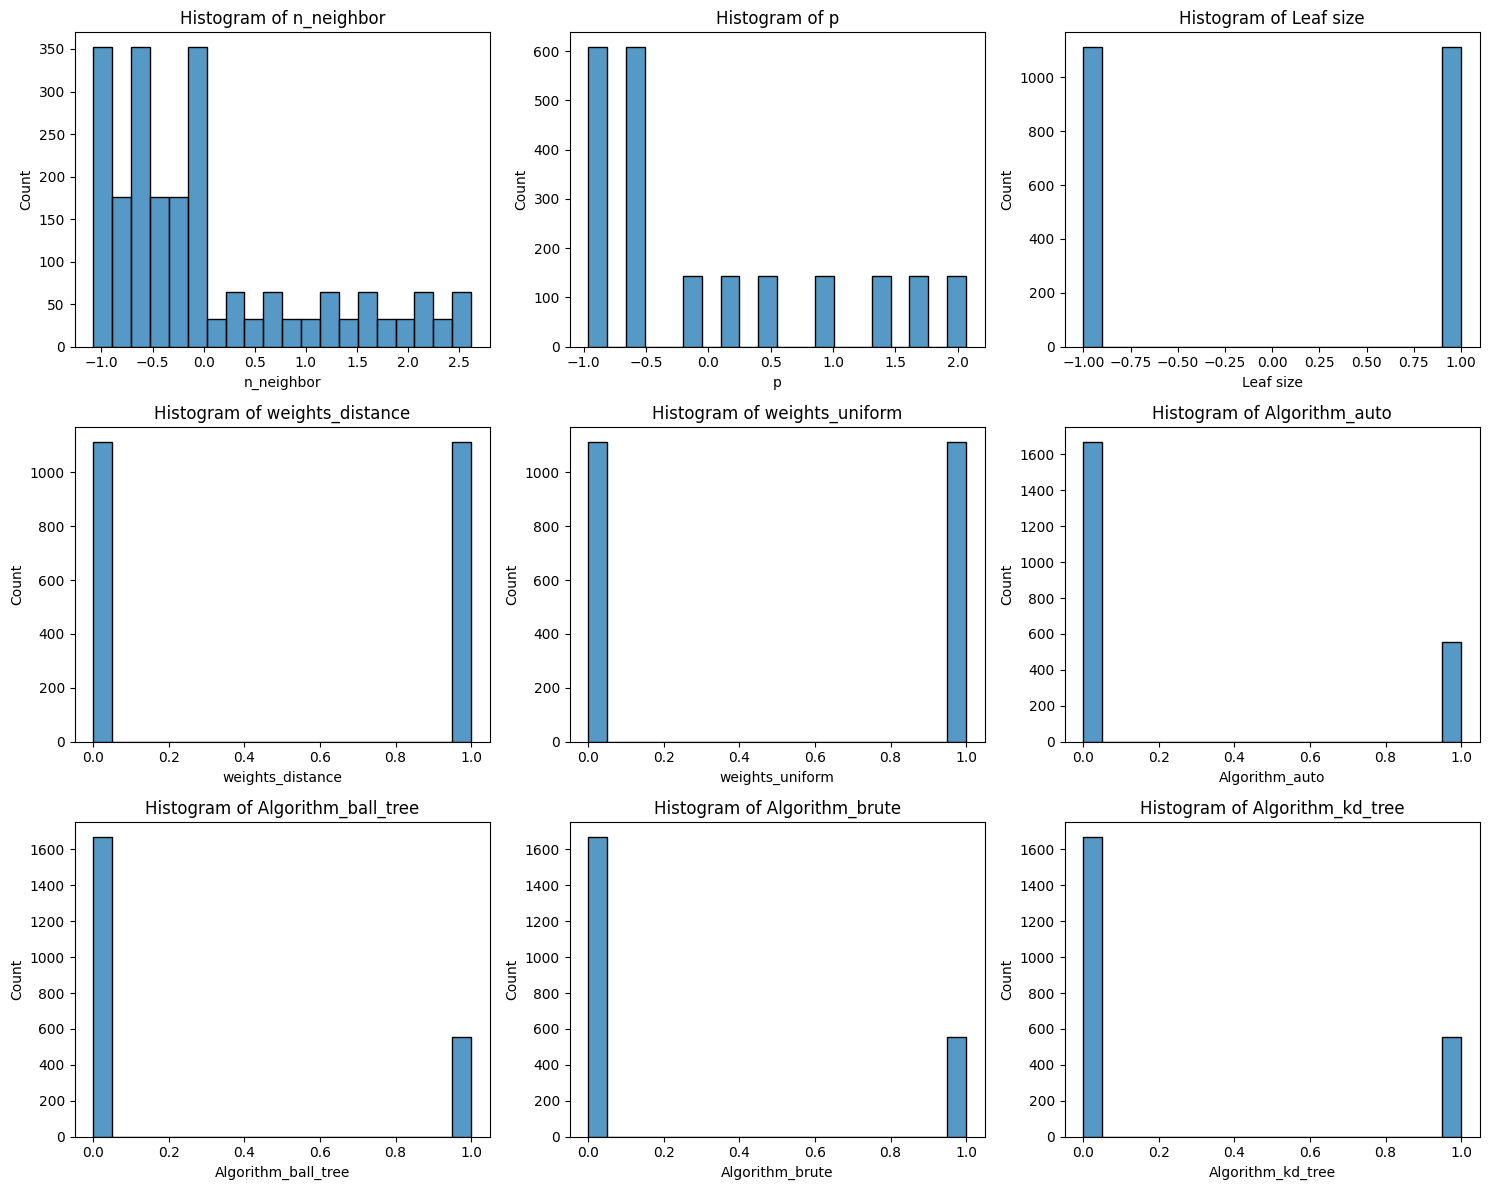